In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
import numpy as np

from ramandecompy import dataprep
from ramandecompy import dataplot

In [2]:
# dataprep.new_hdf5('dataplot_300')

In [4]:
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_25s.csv')
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_35s.csv')
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_45s.csv')
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_55s.csv')
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_65s.csv')
dataprep.view_hdf5('dataplot_300.hdf5')

**** dataplot_300.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak

In [ ]:
# dataprep.adjust_peaks('dataplot_300.hdf5', '300C/35s', [1270, 1350, 1385], plot_fits=True)

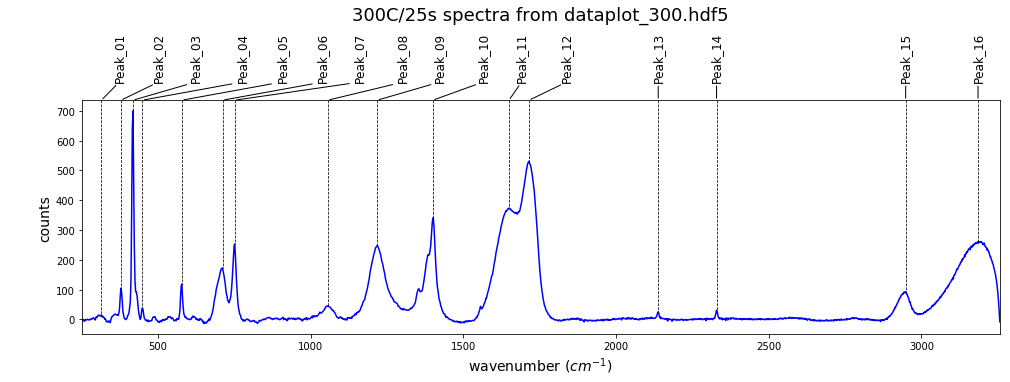

In [5]:
fig, ax = dataprep.plot_fit('dataplot_300.hdf5', '300C/25s')

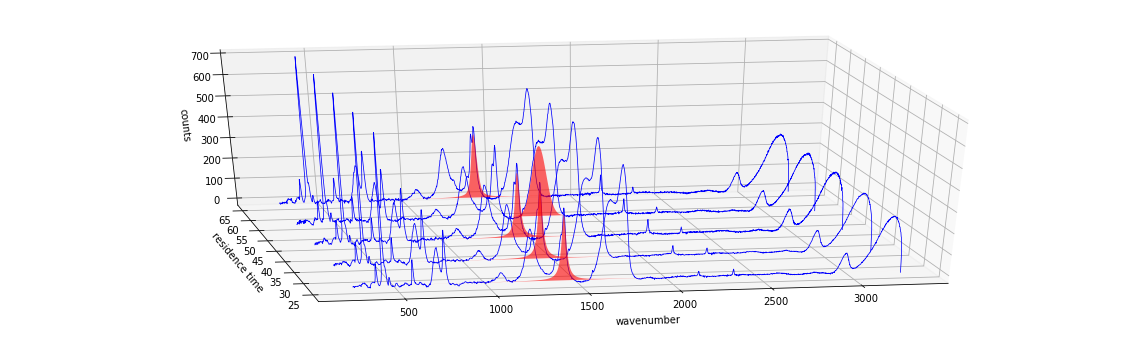

In [7]:
hdf5 = h5py.File('dataplot_300.hdf5', 'r')

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection='3d')

for _, time in enumerate(list(hdf5['300C'].keys())):
    x_data = list(hdf5['300C/{}/wavenumber'.format(time)])
    y_data = list(hdf5['300C/{}/counts'.format(time)]) 
    ax.plot(x_data, y_data, zs=int(time[:-1]), zdir='y', c='blue', linewidth=0.75)

ax.view_init(30, -100)
ax.set_xlabel('wavenumber', labelpad=20)
ax.set_ylabel('residence time')
ax.set_zlabel('counts')

from matplotlib.collections import PolyCollection

def polygon_under_graph(xlist, ylist):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    """
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]

for _, time in enumerate(list(hdf5['300C'].keys())):
    peak_number = 10
    key = '300C/{}'.format(time)
    # extract wavenumber data
    x_data = list(hdf5[key+'/wavenumber'])
    # add zero to the beginning of any single digit peak number
    if peak_number < 10:
        peak_number = '0{}'.format(peak_number)
    else:
        peak_number = '{}'.format(peak_number)
    # extract pseudo voigt parameters
    peak_params = hdf5[key+'/Peak_'+peak_number]
    fraction, sigma, center, amplitude = peak_params[0:4]
    # calculate pseudo voigt distribution from peak_params
    y_data = dataplot.pseudo_voigt(x_data, amplitude, center, sigma, fraction)

    verts = []
    verts.append(polygon_under_graph(x_data, y_data))

    poly = PolyCollection(verts, facecolors='r', alpha=.6)
    ax.add_collection3d(poly, zs=int(time[:-1]), zdir='y')
    
hdf5.close()